<a href="https://colab.research.google.com/github/KrimssmirK/SoftwareEngineering2.0/blob/main/Aur%C3%A9lien_G%C3%A9ron_ml/Chapter_4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Linear Regression model prediction

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdot\cdot\cdot + \theta_n x_n $  $\space\space\space(1)$

- $\hat{y}$ is the predicted value.
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value.
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2, \cdot\cdot\cdot, \theta_n$

Linear Regression model prediction (vectorized form)

$\hat{y} = h_{\theta}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}$

- $\boldsymbol{\theta}$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

- $\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.

- $\boldsymbol{\theta} \cdot \mathbf{x}$ is the dot product of the vectors $\boldsymbol{\theta}$ and $\mathbf{x}$, which is of course equal to $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

- $h_\theta$ is the hypothesis function, using the model parameters $\boldsymbol{\theta}$.

MSE cost function for a Linear Regression model

MSE$(\mathbf{X}, h_{\theta}) = \frac{1}{m}\displaystyle\sum^{m}_{i=1}(\boldsymbol\theta^T\mathbf{x}^{(i)} - y^{(i)})^2$

## The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

Normal Equation

$\hat{\boldsymbol\theta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^Ty$
$\space\space\space(2)$

- $\hat{\boldsymbol\theta}$ is the value of $\boldsymbol\theta$ that minimizes the cost function.
- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

test normal equation (2) on linear regression (1)

In [ ]:
import numpy as np

In [ ]:
X = 2 * np.random.rand(100, 1)

In [ ]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
import matplotlib.pyplot as plt

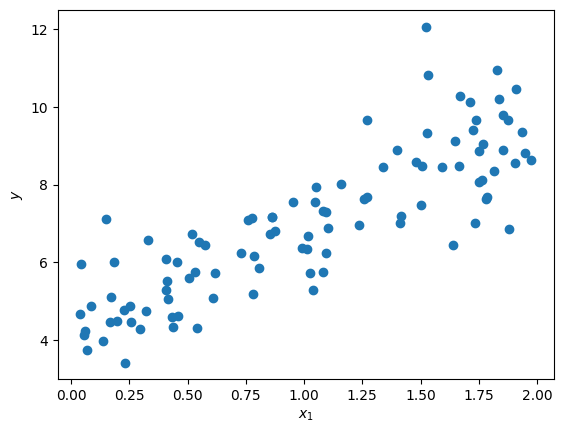

In [ ]:
plt.scatter(X, y)
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]

normal equation (2)

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.32956792],
       [2.61141557]])

make predictions

In [ ]:
# two data which forms matrix not one vector
X_new = np.array([[0], [2]])

In [ ]:
# prepare the data
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [ ]:
# predict
y_predict = X_new_b.dot(theta_best)

In [ ]:
y_predict

array([[4.32956792],
       [9.55239905]])

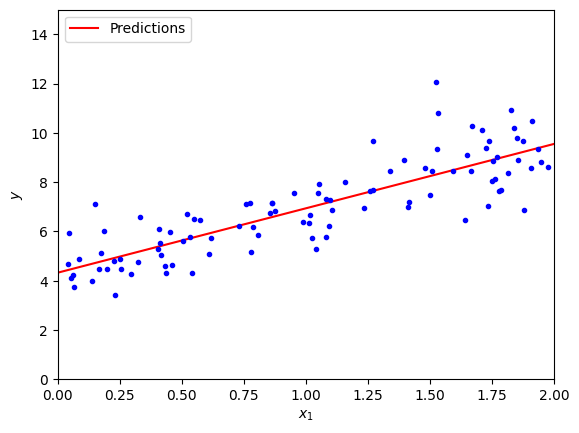

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.show()

using scikit learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.32956792]), array([[2.61141557]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.32956792],
       [9.55239905]])

# Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.


## Batch Gradient Descent

Partial derivatives of the cost function

$\frac{\partial}{\partial\theta_j}$MSE$(\boldsymbol\theta) = \frac{2}{m}\displaystyle\sum^m_{i = 1}(\boldsymbol\theta^T\mathbf{x}^{(i)} - y^{(i)})x^{(i)}_j$

Gradient vector of the cost function

$\nabla_\boldsymbol\theta$MSE$(\boldsymbol\theta) = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol\theta-\mathbf{y})$

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play:5 multiply the gradient vector by η to determine the size of the downhill step.

Gradient Descent step

$\boldsymbol\theta^{(next \space step)} = \boldsymbol\theta-\eta\nabla_\boldsymbol\theta$MSE$(\boldsymbol\theta)$

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1_000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.32956792],
       [2.61141557]])

## Stochastic Gradient Descent

Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.33262905],
       [2.55419304]])

scikit learn

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1_000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.30490269]), array([2.6109566]))

## Mini-batch Gradient Descent

It is like Stochastic Gradient Descent but this time it takes mini batches of instances not only one instance per iteration.

In [ ]:
n_epochs = 20
t0, t1 = 5, 50 # learning schedule hyperparameters
n_batch = 10

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xn = X_b[random_index:random_index+n_batch]
    yn = y[random_index:random_index+n_batch]
    gradients = 2 * xn.T.dot(xn.dot(theta) - yn)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.3372762 ],
       [2.63197055]])

# Polynomial Regression

To fit nonlinear data to Linear Regression, one technique used is Polynomial Regression by adding powers of each feature as new features, then train a linear model on this extended set of features.

In [ ]:
m = 100

In [ ]:
X = 6 * np.random.rand(m, 1) - 3

In [ ]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

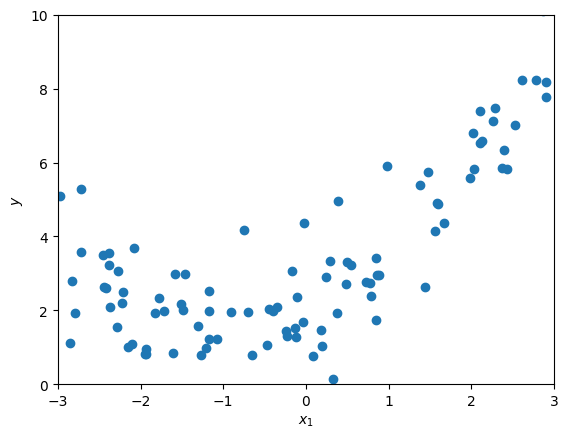

In [ ]:
plt.scatter(X, y)
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([1.60039804])

In [ ]:
X_poly[0]

array([1.60039804, 2.56127387])

Train with Linear Regression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([2.00565566]), array([[0.98382496, 0.49093472]]))

plot predicted values

In [ ]:
predicted_values = lin_reg.predict(X_poly)

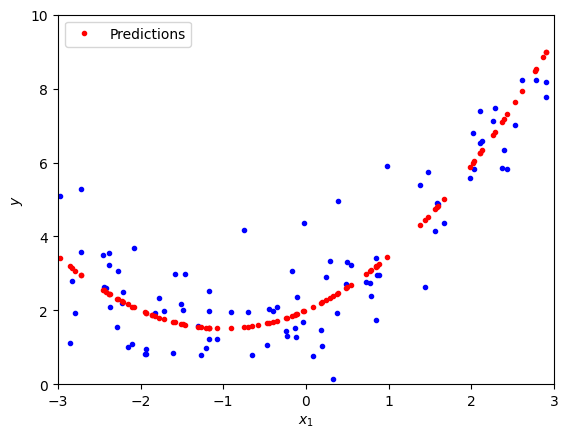

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, predicted_values, "r.", label="Predictions")
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend(loc="upper left")
plt.show()

# Learning Curves

This is the other way to know whether the model is underfitting or overfitting.

In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.legend(loc="upper right")
  plt.xlabel("Training set size")
  plt.ylabel("RMSE")


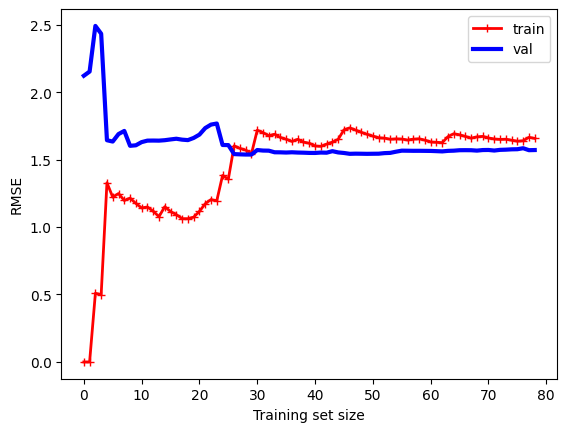

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Learning Curves of a 10th-degree polynomial model

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

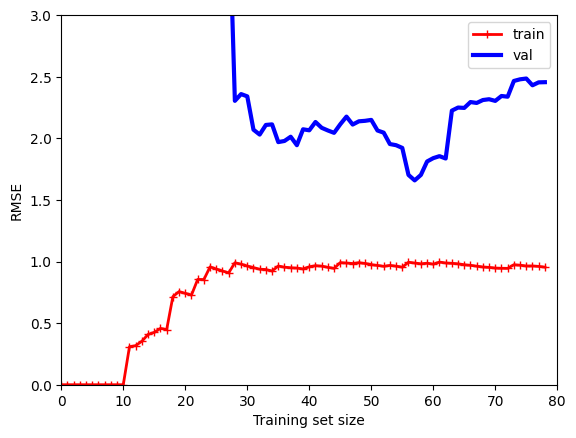

In [ ]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Learning Curves of a 2th-degree polynomial model

In [ ]:
two_degree_polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

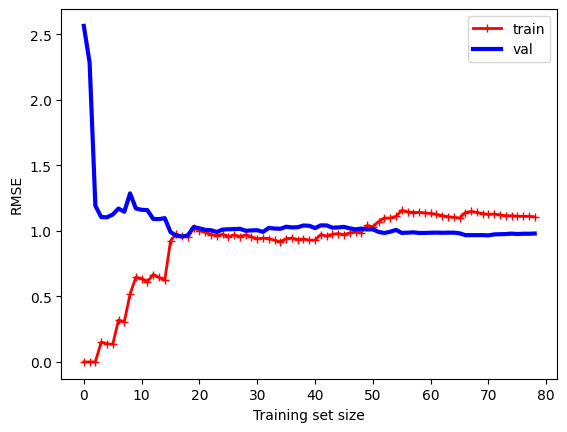

In [ ]:
plot_learning_curves(two_degree_polynomial_regression, X, y)
plt.show()

# Regularized Linear Models

## Ridge Regression

Ridge Regression cost function

$J(\boldsymbol\theta) = $MSE$(\boldsymbol\theta) + \alpha\frac{1}{2}\displaystyle\sum^{n}_{i=1}\theta_i^2$

If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

Ridge Regression closed-form solution

$\hat{\boldsymbol\theta} = (\mathbf{X}^T\mathbf{X} + \alpha\mathbf{A})^{-1} \mathbf{X}^T\mathbf{y}$

A is the (n + 1) × (n + 1) identity matrix, except with a 0 in the top-left cell, corresponding to the bias term.

scikit learn (Ridge Regression using closed-form solution)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [ ]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [ ]:
ridge_reg.predict([[1.5]])

array([[4.88893316]])

scikit learn (Ridge Regression using Stochastic Gradient Descent)

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")

In [ ]:
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [ ]:
sgd_reg.predict([[1.5]])

array([4.85168265])

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression

Lasso Regression cost function

$J(\boldsymbol\theta)=$ MSE$(\boldsymbol\theta)+ \alpha\displaystyle\sum^n_{i = 1}|\theta_i|$

scikit learn example of lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.1)

In [ ]:
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [ ]:
lasso_reg.predict([[1.5]])

array([4.83707798])

## Elastic Net

Combination of Ridge Regression and Lasso Regression

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

Elastic Net cost function

$J(\boldsymbol\theta)=$ MSE$(\boldsymbol\theta) + r\alpha\displaystyle\sum^n_{i=1}|\theta_i| + \frac{1-r}{2}\alpha\displaystyle\sum^n_{i=1}\theta^2_i$

scikit learn example of elastic net

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [ ]:
elastic_net.predict([[1.5]])

array([4.83942629])

## Early Stopping

stop the training when the validation error stops decreasing.

example implementation of early stopping

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import clone

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42
)



# transform the data
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

epochs = []
train_errors = []
val_errors = []

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)

  # training
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)
  train_error = mean_squared_error(y_train, y_train_predict)
  # store
  train_errors.append(np.sqrt(train_error))


  # validation
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  # store
  val_errors.append(np.sqrt(val_error))



  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

  epochs.append(epoch)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/loc

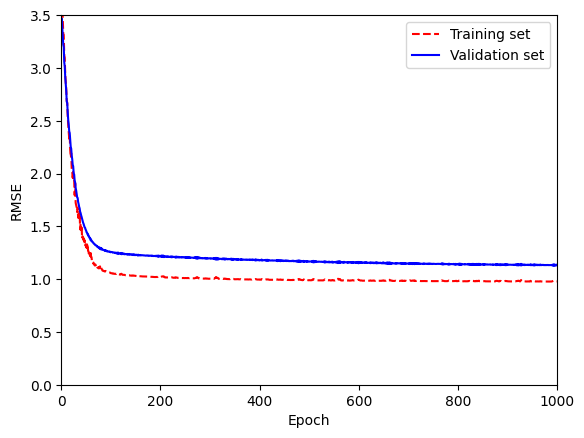

In [ ]:
plt.plot(epochs, train_errors, "r--", label="Training set")
plt.plot(epochs, val_errors, "b-", label="Validation set")
plt.axis([0, 1_000, 0.0, 3.5])
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.show()

In [ ]:
best_epoch

994

look closer

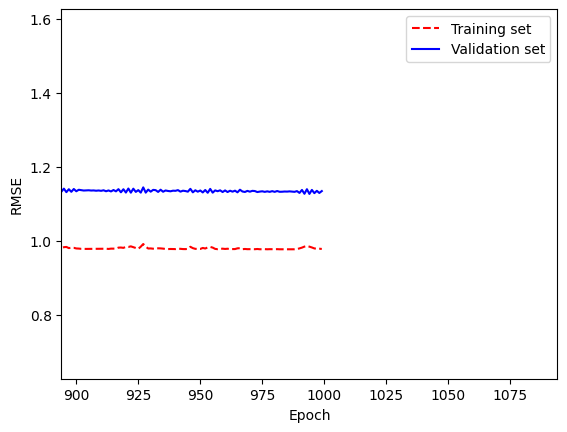

In [ ]:
plt.plot(epochs, train_errors, "r--", label="Training set")
plt.plot(epochs, val_errors, "b-", label="Validation set")
plt.axis([best_epoch-100, best_epoch+100, val_errors[best_epoch]-0.5, val_errors[best_epoch]+0.5])
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.show()

# Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?).

## Estimating Probabilities

Logistic Regression model estimated probability (vectorized form)

$\hat p = h_\theta(\mathbf{x}) = \sigma(\mathbf{x}^T\boldsymbol{\theta})$

Logistic function

$\sigma(t) = \frac{1}{1+e^{-t}}$

Logistic Regression model prediction

$\hat{y} = \left\{ \begin{array}{rcl} 0 & \mbox{if} & \hat{p} < 0.5  \\ 1 & \mbox{if} & \hat{p} \geq 0.5 \end{array}\right.$

## Training and Cost Function

Cost function of a single training instance

$c(\boldsymbol\theta) = \left\{ \begin{array}{rcl} -\log(\hat{p}) & \mbox{if} & y = 1 \\ -\log(1-\hat{p}) & \mbox{if} & y = 0\end{array} \right.$

–log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance.

Logistic Regression cost function (log loss)

$J(\boldsymbol\theta) = -\frac{1}{m}\displaystyle\sum^m_{i=1}[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})]$



Logistic cost function partial derivatives

$\frac{\partial}{\partial\theta_j}J(\boldsymbol\theta) = \frac{1}{m}\displaystyle\sum^m_{i=1}(\sigma(\boldsymbol\theta^T\mathbf{x}^{(i)})-y^{(i)})x^{(i)}_j$

for each instance it computes the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm. That’s it: you now know how to train a Logistic Regression model. For Stochastic GD you would take one instance at a time, and for Mini-batch GD you would use a mini- batch at a time.

## Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression.

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:


In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:]

In [ ]:
y = (iris["target"] == 2).astype(int)

 train a Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

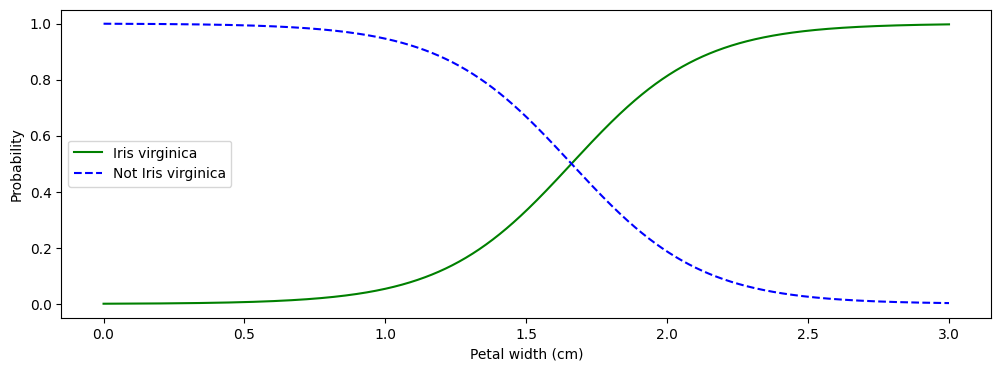

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(12,4))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.show()